<a href="https://colab.research.google.com/github/aakhavi/Machine-Learning-in-Python/blob/main/GSB_545_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GSB 545 Lab 7
# Arash Akhavi
# 5/19/2022

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import mean
from numpy import std
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Flatten, TimeDistributed, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

In [ ]:
# read in data
data = pd.read_csv("/content/drive/MyDrive/GSB 545 Data/dc.csv")
data.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [ ]:
data.columns

Index(['Unnamed: 0', 'open_SAR', 'open_USD', 'high_SAR', 'high_USD', 'low_SAR',
       'low_USD', 'close_SAR', 'close_USD', 'volume'],
      dtype='object')

# Data Prepreation

In [ ]:
# scale currencies for RNN
scaler = MinMaxScaler()
data[['open_SAR', 'open_USD', 'high_SAR', 'high_USD', 'low_SAR',
       'low_USD', 'close_SAR', 'close_USD', 'volume']] = scaler.fit_transform(data[['open_SAR', 'open_USD', 'high_SAR', 'high_USD', 'low_SAR',
       'low_USD', 'close_SAR', 'close_USD', 'volume']])
data.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,0.830351,0.830351,0.818558,0.818558,0.834241,0.834241,0.829701,0.829701,0.094156
1,2021-01-29,0.806857,0.806857,0.911616,0.911616,0.808665,0.808665,0.830601,0.830601,0.570260
2,2021-01-28,0.726429,0.726429,0.788847,0.788847,0.750367,0.750367,0.806857,0.806857,0.219135
3,2021-01-27,0.782665,0.782665,0.757128,0.757128,0.733485,0.733485,0.726616,0.726616,0.227434
4,2021-01-26,0.777051,0.777051,0.766555,0.766555,0.778352,0.778352,0.782852,0.782852,0.199842


In [ ]:
# define response and predictors
data = data['open_USD']

# Simple RNN Model

In [ ]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(data, split_percent=0.8):
    data = np.array(data.values.astype('float32'))
    #data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data

In [ ]:
train_data, test_data = get_train_test(data, split_percent=0.8)

In [ ]:
def get_XY(data, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(data), time_steps)
    Y = data[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = data[range(time_steps*rows_x)]
    print(X.shape)
    print(rows_x)
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

In [ ]:
time_steps = 2
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

(798,)
399
(198,)
99


In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
model1 = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model1.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
399/399 - 4s - loss: 0.0107 - 4s/epoch - 10ms/step
Epoch 2/20
399/399 - 1s - loss: 0.0038 - 1s/epoch - 3ms/step
Epoch 3/20
399/399 - 1s - loss: 0.0030 - 1s/epoch - 3ms/step
Epoch 4/20
399/399 - 1s - loss: 0.0027 - 1s/epoch - 3ms/step
Epoch 5/20
399/399 - 1s - loss: 0.0025 - 1s/epoch - 3ms/step
Epoch 6/20
399/399 - 1s - loss: 0.0023 - 1s/epoch - 4ms/step
Epoch 7/20
399/399 - 2s - loss: 0.0021 - 2s/epoch - 4ms/step
Epoch 8/20
399/399 - 1s - loss: 0.0021 - 1s/epoch - 3ms/step
Epoch 9/20
399/399 - 2s - loss: 0.0019 - 2s/epoch - 4ms/step
Epoch 10/20
399/399 - 1s - loss: 0.0018 - 1s/epoch - 3ms/step
Epoch 11/20
399/399 - 1s - loss: 0.0017 - 1s/epoch - 3ms/step
Epoch 12/20
399/399 - 1s - loss: 0.0017 - 1s/epoch - 3ms/step
Epoch 13/20
399/399 - 1s - loss: 0.0015 - 1s/epoch - 3ms/step
Epoch 14/20
399/399 - 1s - loss: 0.0015 - 1s/epoch - 3ms/step
Epoch 15/20
399/399 - 1s - loss: 0.0015 - 867ms/epoch - 2ms/step
Epoch 16/20
399/399 - 1s - loss: 0.0014 - 1s/epoch - 3ms/step
Epoch 17/20
3

In [ ]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

In [ ]:
# make predictions
train_predict = model1.predict(trainX)
test_predict = model1.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.034 RMSE
Test RMSE: 0.013 RMSE


In [ ]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Bitcoin Price in USD scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples using Simple RNN')

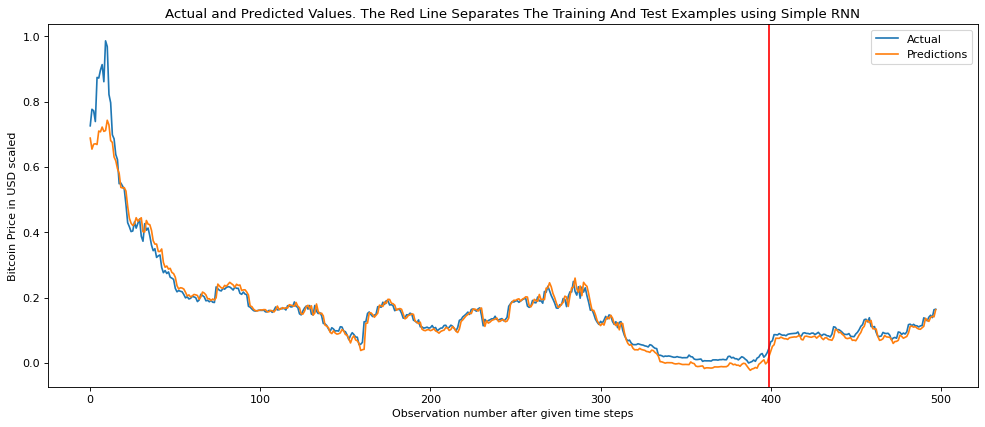

In [ ]:
plot_result(trainY, testY, train_predict, test_predict)

# LSTM

In [ ]:
train_data, test_data = get_train_test(data, split_percent=0.8)

In [ ]:
time_steps = 2
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

(798,)
399
(198,)
99


In [ ]:
def create_RNN_LSTM(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
model2 = create_RNN_LSTM(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model2.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
399/399 - 3s - loss: 0.0273 - 3s/epoch - 7ms/step
Epoch 2/20
399/399 - 1s - loss: 0.0160 - 817ms/epoch - 2ms/step
Epoch 3/20
399/399 - 1s - loss: 0.0088 - 880ms/epoch - 2ms/step
Epoch 4/20
399/399 - 1s - loss: 0.0037 - 960ms/epoch - 2ms/step
Epoch 5/20
399/399 - 1s - loss: 0.0018 - 844ms/epoch - 2ms/step
Epoch 6/20
399/399 - 1s - loss: 0.0013 - 791ms/epoch - 2ms/step
Epoch 7/20
399/399 - 1s - loss: 0.0011 - 684ms/epoch - 2ms/step
Epoch 8/20
399/399 - 1s - loss: 9.2741e-04 - 731ms/epoch - 2ms/step
Epoch 9/20
399/399 - 1s - loss: 7.9773e-04 - 808ms/epoch - 2ms/step
Epoch 10/20
399/399 - 1s - loss: 7.0439e-04 - 784ms/epoch - 2ms/step
Epoch 11/20
399/399 - 1s - loss: 6.3589e-04 - 755ms/epoch - 2ms/step
Epoch 12/20
399/399 - 1s - loss: 5.8338e-04 - 714ms/epoch - 2ms/step
Epoch 13/20
399/399 - 1s - loss: 5.3211e-04 - 710ms/epoch - 2ms/step
Epoch 14/20
399/399 - 1s - loss: 5.2304e-04 - 866ms/epoch - 2ms/step
Epoch 15/20
399/399 - 1s - loss: 4.9284e-04 - 657ms/epoch - 2ms/step
Epoch

In [ ]:
# make predictions
train_predict = model2.predict(trainX)
test_predict = model2.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.021 RMSE
Test RMSE: 0.010 RMSE


In [ ]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Bitcoin Price in USD scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples using LSTM RNN')

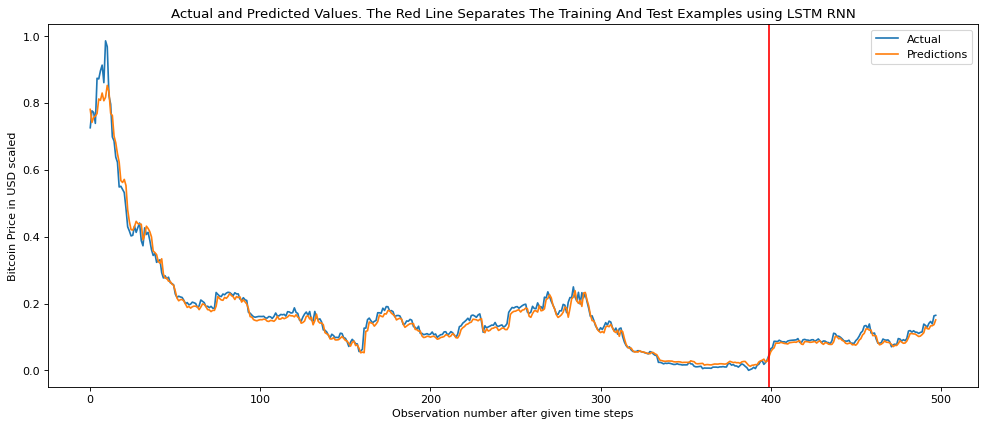

In [ ]:
plot_result(trainY, testY, train_predict, test_predict)

# GRU



In [ ]:
train_data, test_data = get_train_test(data, split_percent=0.8)

In [ ]:
time_steps = 2
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

(798,)
399
(198,)
99


In [ ]:
def create_RNN_GRU(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(GRU(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
model3 = create_RNN_GRU(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model3.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
399/399 - 2s - loss: 0.0622 - 2s/epoch - 6ms/step
Epoch 2/20
399/399 - 1s - loss: 0.0399 - 693ms/epoch - 2ms/step
Epoch 3/20
399/399 - 1s - loss: 0.0309 - 688ms/epoch - 2ms/step
Epoch 4/20
399/399 - 1s - loss: 0.0236 - 685ms/epoch - 2ms/step
Epoch 5/20
399/399 - 1s - loss: 0.0167 - 706ms/epoch - 2ms/step
Epoch 6/20
399/399 - 1s - loss: 0.0104 - 671ms/epoch - 2ms/step
Epoch 7/20
399/399 - 1s - loss: 0.0052 - 720ms/epoch - 2ms/step
Epoch 8/20
399/399 - 1s - loss: 0.0022 - 732ms/epoch - 2ms/step
Epoch 9/20
399/399 - 1s - loss: 0.0010 - 721ms/epoch - 2ms/step
Epoch 10/20
399/399 - 1s - loss: 7.1951e-04 - 664ms/epoch - 2ms/step
Epoch 11/20
399/399 - 1s - loss: 6.5978e-04 - 766ms/epoch - 2ms/step
Epoch 12/20
399/399 - 1s - loss: 6.5946e-04 - 1s/epoch - 3ms/step
Epoch 13/20
399/399 - 1s - loss: 6.3249e-04 - 750ms/epoch - 2ms/step
Epoch 14/20
399/399 - 1s - loss: 6.0557e-04 - 763ms/epoch - 2ms/step
Epoch 15/20
399/399 - 1s - loss: 5.8177e-04 - 653ms/epoch - 2ms/step
Epoch 16/20
399/

In [ ]:
# make predictions
train_predict = model3.predict(trainX)
test_predict = model3.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.022 RMSE
Test RMSE: 0.010 RMSE


In [ ]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Bitcoin Price in USD scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples using GRU RNN')

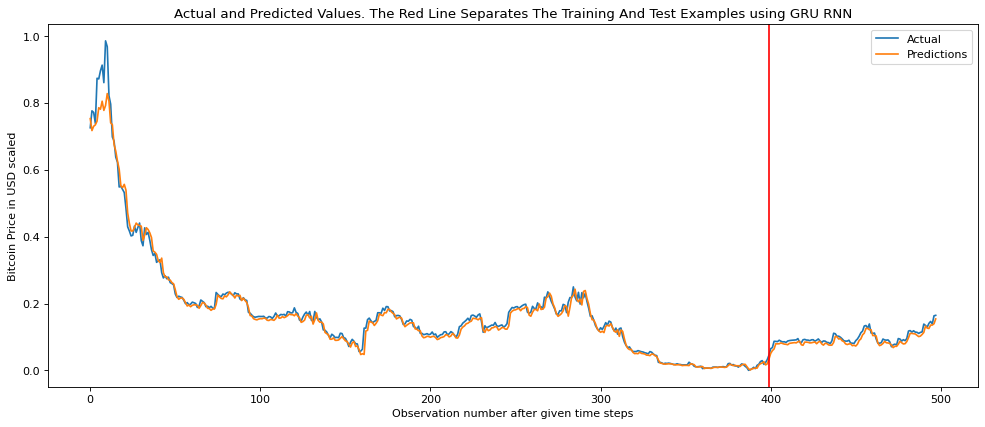

In [ ]:
plot_result(trainY, testY, train_predict, test_predict)

In this portion of the lab the Simple RNN, LSTM, and GRU models were explored with the same initial parameters as one another for an accurate comparison. The simple RNN model preformed the best with the lowest test RSME of 0.007, followed closely by the GRU RNN model (0.008), and the LSTM RNN model (0.010). 

Now we will alter the parameters of the highest preforming models, Simple RNN and GRU RNN, and see how they preform.

# Simple RNN Model 2

In [ ]:
train_data, test_data = get_train_test(data, split_percent=0.85)

In [ ]:
time_steps = 4
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

(848,)
212
(148,)
37


In [ ]:
model4 = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model4.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
212/212 - 2s - loss: 0.0172 - 2s/epoch - 11ms/step
Epoch 2/10
212/212 - 0s - loss: 0.0062 - 441ms/epoch - 2ms/step
Epoch 3/10
212/212 - 1s - loss: 0.0026 - 849ms/epoch - 4ms/step
Epoch 4/10
212/212 - 1s - loss: 0.0018 - 950ms/epoch - 4ms/step
Epoch 5/10
212/212 - 1s - loss: 0.0015 - 794ms/epoch - 4ms/step
Epoch 6/10
212/212 - 0s - loss: 0.0013 - 465ms/epoch - 2ms/step
Epoch 7/10
212/212 - 0s - loss: 0.0011 - 478ms/epoch - 2ms/step
Epoch 8/10
212/212 - 0s - loss: 0.0010 - 347ms/epoch - 2ms/step
Epoch 9/10
212/212 - 0s - loss: 9.3843e-04 - 318ms/epoch - 2ms/step
Epoch 10/10
212/212 - 0s - loss: 8.8030e-04 - 379ms/epoch - 2ms/step


In [ ]:
# make predictions
train_predict = model4.predict(trainX)
test_predict = model4.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.029 RMSE
Test RMSE: 0.009 RMSE


In [ ]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Bitcoin Price in USD scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples using Simple RNN')

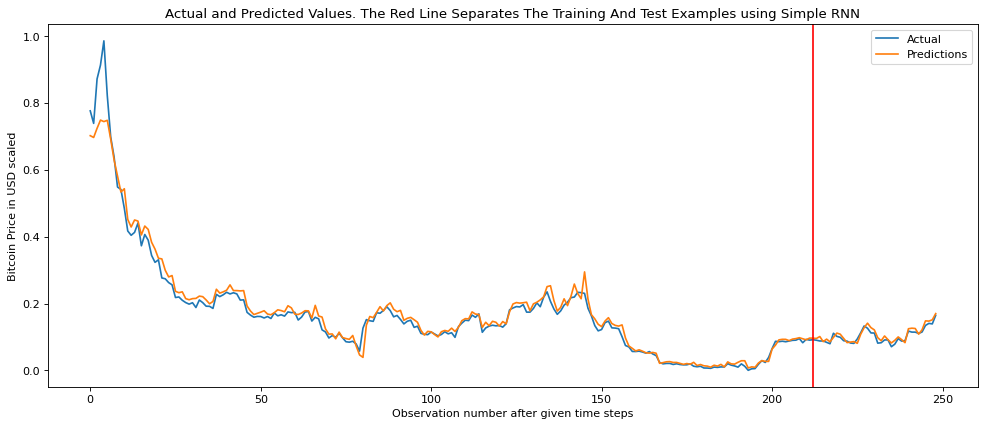

In [ ]:
plot_result(trainY, testY, train_predict, test_predict)

Initially the split was increased to 0.85 from 0.80 and the epochs were increased to 40 from 20. The epochs were then decreased from 40 to 10 which resulted in a drop in test RSME from 0.013 to 0.012 which are both higher than the test RSME from the original simple RNN model from prior. 

The final simple RNN model made was with 10 epochs and a time step of 4. This resulted in the best test RSME value of 0.009, however the original simple RNN model is still better. 

# GRU Model 2

In [ ]:
train_data, test_data = get_train_test(data, split_percent=0.85)

In [ ]:
time_steps = 4
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

(848,)
212
(148,)
37


In [ ]:
model5 = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model5.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
212/212 - 2s - loss: 0.0180 - 2s/epoch - 11ms/step
Epoch 2/10
212/212 - 1s - loss: 0.0098 - 1s/epoch - 6ms/step
Epoch 3/10
212/212 - 1s - loss: 0.0075 - 687ms/epoch - 3ms/step
Epoch 4/10
212/212 - 0s - loss: 0.0058 - 408ms/epoch - 2ms/step
Epoch 5/10
212/212 - 0s - loss: 0.0046 - 407ms/epoch - 2ms/step
Epoch 6/10
212/212 - 0s - loss: 0.0038 - 309ms/epoch - 1ms/step
Epoch 7/10
212/212 - 0s - loss: 0.0032 - 375ms/epoch - 2ms/step
Epoch 8/10
212/212 - 0s - loss: 0.0027 - 464ms/epoch - 2ms/step
Epoch 9/10
212/212 - 0s - loss: 0.0023 - 448ms/epoch - 2ms/step
Epoch 10/10
212/212 - 0s - loss: 0.0020 - 439ms/epoch - 2ms/step


In [ ]:
# make predictions
train_predict = model5.predict(trainX)
test_predict = model5.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.043 RMSE
Test RMSE: 0.011 RMSE


In [ ]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Bitcoin Price in USD scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples using GRU RNN')

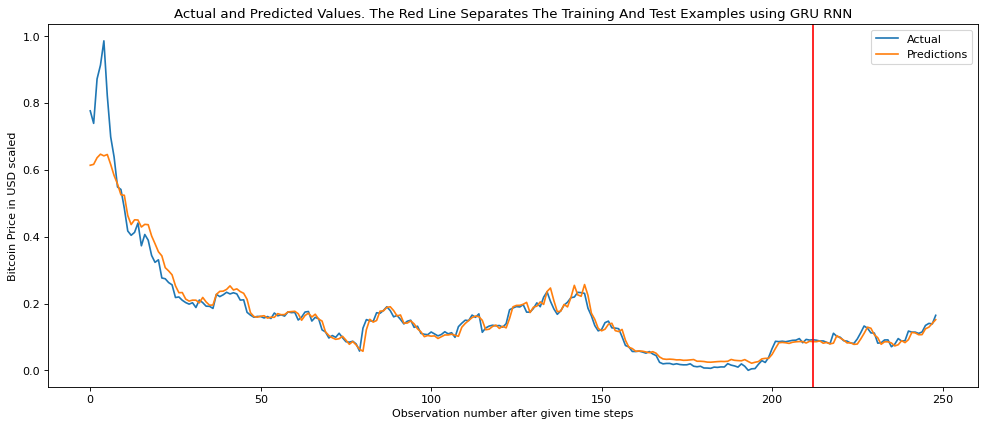

In [ ]:
plot_result(trainY, testY, train_predict, test_predict)

Using the same parameters as the simple RNN model before (model 4), the new GRU model preforms worse than the original one with a test RSME of 0.011. The original GRU RNN model had a RSME of 0.008. 